In [1]:
from sklearn.datasets import load_wine
import pandas as pd

In [2]:
wine = load_wine()

#to dataframe
df_origin = pd.DataFrame(wine.data, columns=wine.feature_names)
df_origin["target"] = wine.target

df_origin.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [9]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
from sklearn.model_selection import train_test_split
(train_X, test_X, train_y, test_y) = train_test_split(df_origin.drop("target", axis=1), df_origin.target, test_size=0.3, random_state=86)

In [4]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV


tuned_parameters = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_leaf_nodes": [2,4,6,8,10]
}

clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0, splitter='best'), tuned_parameters, scoring="accuracy",cv=5, n_jobs=-1)
clf = clf.fit(train_X, train_y)

print("Best Parameter: {}".format(clf.best_params_))
print("Best Parameterでの検証用データの精度: {:.2f}".format(clf.score(test_X, test_y)))
print("Best Parameterで交差検証した精度の平均（訓練データ）: {:.2f}".format(clf.best_score_))

Best Parameter: {'max_depth': 4, 'max_leaf_nodes': 6}
Best Parameterでの検証用データの精度: 0.93
Best Parameterで交差検証した精度の平均（訓練データ）: 0.92


/Users/ryo_tanaka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [5]:
clf = tree.DecisionTreeClassifier(max_depth=clf.best_params_["max_depth"], max_leaf_nodes=clf.best_params_["max_leaf_nodes"], random_state=0)
clf = clf.fit(train_X, train_y)

In [12]:
clf.score(test_X, test_y)

0.9259259259259259

/Users/ryo_tanaka/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


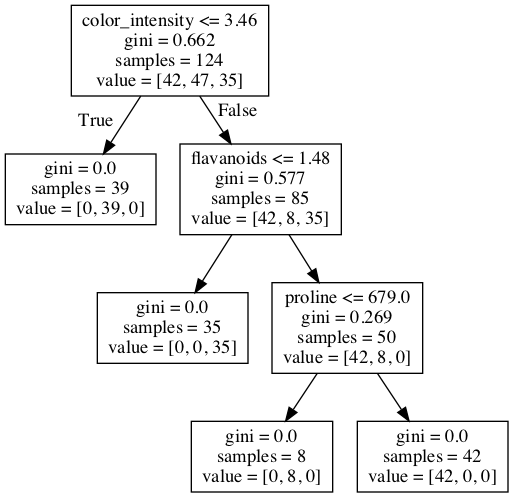

In [6]:
#可視化（graphviz）
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [28]:
#可視化(dtreeviz)
#dtreevizの可視化をjupyterで行うとnotebookのformatが崩れるので、svgで保存して、pngに変換する

from dtreeviz.trees import dtreeviz
from cairosvg import svg2png

viz = dtreeviz(
    clf,
    wine.data, 
    wine.target,
    target_name="target",
    feature_names=wine.feature_names,
    class_names=[str(i) for i in wine.target_names],
) 

viz.save("wine_tree.svg")

svg2png(url="wine_tree.svg", write_to='wine_tree.png')

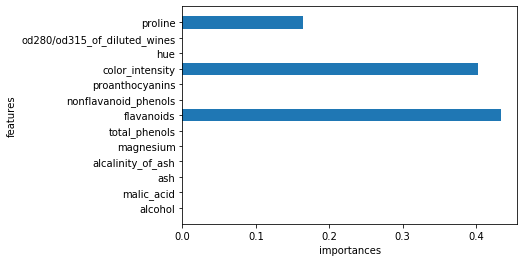

In [8]:
#変数重要度

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def plot_feature_importances(model):
    n_features = wine.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), wine.feature_names)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.show()

plot_feature_importances(clf)